In [18]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
import seaborn as sns
import pandas as pd
import plotly.express as px
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objects as go

## Preparing Data
For this Part we will be using a dataset giving the living areas and prices of 47 houses from Portland, Oregon . Also we have rescale the data so that we get 0 as mean and 1 as Standarad Deviation

In [19]:
#read ex1data2.txt file where first two columns are X1 and X2 and last column is Y
df = pd.read_csv('ex1data2.txt', header=None)
#rescale the data to be between 0 and 1
df = (df - df.mean()) / df.std()
#insert one column of ones to the dataframe at the front
df.insert(0, 'Ones', 1)

df.columns = ['X0','Area', 'Bedrooms', 'Prices(1000$)']
#divide the last column by 1000 to get the prices in 1000$
#df['Prices(1000$)'] = df['Prices(1000$)'] / 1000
df.head()

,X0,Area,Bedrooms,Prices(1000$)
0,1,0.130010,-0.223675,0.475747
1,1,-0.504190,-0.223675,-0.084074
2,1,0.502476,-0.223675,0.228626
3,1,-0.735723,-1.537767,-0.867025
4,1,1.257476,1.090417,1.595389


In [20]:
# create a separate dataframe for features (X) and target (y)
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values
print(X.shape, y.shape)

(47, 3) (47,)


## Hypothesis Function 
![alt text](hypothesis.jpg "Title")

In [21]:
def hypothesis(theta, x):
    '''
    This function calculates the hypothesis function

    Parameters
    ----------
    theta : array-like of shape (n,)
        The coefficients of the linear regression model.
    x : array-like of shape (n,)
        The input data.
    
    Returns
    -------
    float
        The output of the hypothesis function.

    '''
    #calculate the hypothesis function using theta and x
    #H(x) = transpose(theta) * x
    #if the length of x is one less than the length of theta then insert a column of ones to x to the front
    if len(x) == len(theta) - 1:
        #print(len(x), len(theta))
        x = np.insert(x, 0, 1)
    return np.dot(theta, x)

## The Cost Function
![alt text](cost.jpg "Title")

In [22]:
def cost_function(theta, x, y):
    '''
    This function calculates the cost function

    Parameters
    ----------
    theta : array-like of shape (n,)
        The coefficients of the linear regression model.
    x : array-like of shape (n,m)
        The input data.
    y : array-like of shape (n,)
        The target data.
    
    Returns
    -------
    float
        The output of the cost function.

    '''
    cost=0
    
    
    for i in range(len(y)):
        cost += (hypothesis(theta, x[i]) - y[i])**2

   # print("cost = ",cost/2*(len(y)))
    return cost/2*(len(y))

## Stochastic Gradient Descent
![alt text](stochastic.jpg "Batch_Gradient")

In [23]:
def stochastic_gradient_descent(theta, x, y, alpha, iterations,epsilon):
    '''
    This function calculates the stochastic gradient descent

    Parameters
    ----------
    theta : array-like of shape (n,)
        The coefficients of the linear regression model.
    x : array-like of shape (n,m)
        The input data.
    y : array-like of shape (n,)
        The target data.
    alpha : float
        The learning rate.
    iterations : int
        The number of iterations.
    
    Returns
    -------
    array-like of shape (n,)
        The output of the gradient descent.

    '''
    #calculate the gradient descent
    #store all the values of theta in a list and corresponding cost in another list
    theta_list = []
    cost_list = []
    #repeat until convergence
    #print(theta,"cost is",cost_function(theta, x, y))
    #print(theta,"cost is",cost_function(theta, x, y))
    theta_list.append(theta)
    cost_list.append(cost_function(theta, x, y))
    for u in range(iterations):
        for i in range(1,len(y)):
            for j in range(len(theta)):
                theta[j] = theta[j] + alpha*(1/(len(y)))*(y[i]-hypothesis(theta,x[i]))*x[i][j]
        #print(theta,"cost is",cost_function(theta, x, y))
        theta_list.append(list(theta))
        cost_list.append(cost_function(theta, x, y))
        if u>0:
            if cost_list[u-1]-cost_list[u] < epsilon:
                break
        

    return theta, theta_list, cost_list

In [24]:
theta = np.zeros(3)
theta[1]=6
theta[2]=8
theta, theta_list, cost_list = stochastic_gradient_descent(theta, X_train, y_train, 0.1, 1000,0.01)
itrs=len(cost_list)
print(itrs)

141


## J vs iterations

Text(0.5, 1.0, 'Error vs. Training Epoch')

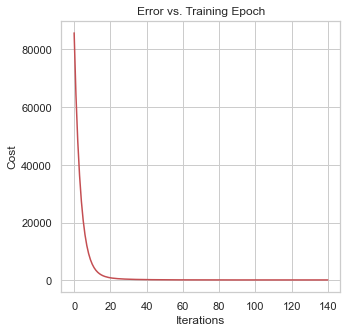

In [25]:
fig, ax = plt.subplots(figsize=(5,5))
ax.plot(np.arange(itrs), cost_list, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')

## Plot of hypothesis plane
Now since we have two features to show the learning model we will need to plot a plane in 3d which i have done by using two libraries "Plotly" and "Matplotlib" Respectively.

In [26]:
plot_hypothesis_plane_plotly(theta)

[-0.04432013  0.77925863  0.01602303]


In [27]:
plot_hypothesis_plane_matplot(theta)

[-0.04432013  0.77925863  0.01602303]


## Contour plot of J vs theta
Contour plot shows how our "theta" is converging to minimize our Cost Function.

In [28]:
def contour_sto(alpha):
    #calculate theta using batch gradient descent - training step
    theta = np.zeros(3)
    theta[1]=6
    theta[2]=8
    theta, theta_list, cost_list = stochastic_gradient_descent(theta, X_train, y_train, alpha, 10000,0.01)
    #print total no of iterations
    itrs=len(cost_list)
    print("Total no of iterations:", itrs)
    #Plot a contour plot of the cost function vs theta1 and theta2
    #create a meshgrid of theta1 and theta2
    theta_list = np.array([list(t) for t in theta_list])
    print("THETA", theta_list)
    theta1_min, theta1_max = theta_list[:,1].min() - 1, theta_list[:,1].max() + 1
    theta2_min, theta2_max = theta_list[:,2].min() - 1, theta_list[:,2].max() + 1
    theta1_grid, theta2_grid = np.meshgrid(np.arange(theta1_min, theta1_max, 0.1), np.arange(theta2_min, theta2_max, 0.1))
    fig, ax = plt.subplots(1, 1, figsize=(8,8))
    
    Z = cost_function(np.c_[np.ones(theta1_grid.ravel().shape[0]), theta1_grid.ravel(), theta2_grid.ravel()], X_train, y_train)
    
    Z = Z.reshape(theta1_grid.shape)
    print(Z)
    
    # plot contour plot wothout background color and line color based on z values
    ax.contourf(theta1_grid, theta2_grid, Z, cmap=plt.cm.cool,  levels = np.linspace(Z.min(), Z.max(), 30))
    # ax.contour(theta1_grid, theta2_grid, Z, colors='k', levels=30)

    ax.scatter(theta_list[0][1], theta_list[0][2], c='r', s=40)
    #put alpha value on the plot
    ax.text(0.05, 0.95, 'alpha = %.2f' % alpha, transform=ax.transAxes, fontsize=14, verticalalignment='top')
    ax.set_xlabel(r'$\theta_1$')
    ax.set_ylabel(r'$\theta_2$')
    ax.set_title('Contour Plot of Cost Function')
    #plot theta_list on the contour plot
    for i in range(len(theta_list)):
        ax.scatter(theta_list[i][1], theta_list[i][2], c='r', s=40)
        
    plt.show()


Total no of iterations: 256
THETA [[-4.46345441e-02  7.72129514e-01  2.14531740e-02]
 [ 5.90623147e-03  5.53339564e+00  7.54985552e+00]
 [ 1.04212330e-02  5.10193116e+00  7.12936390e+00]
 [ 1.37012482e-02  4.70306296e+00  6.73646342e+00]
 [ 1.58884406e-02  4.33442965e+00  6.36923814e+00]
 [ 1.71120423e-02  3.99383903e+00  6.02590750e+00]
 [ 1.74894142e-02  3.67925603e+00  5.70481674e+00]
 [ 1.71270234e-02  3.38879145e+00  5.40442793e+00]
 [ 1.61213453e-02  3.12069155e+00  5.12331167e+00]
 [ 1.45596942e-02  2.87332837e+00  4.86013940e+00]
 [ 1.25209900e-02  2.64519076e+00  4.61367625e+00]
 [ 1.00764642e-02  2.43487601e+00  4.38277434e+00]
 [ 7.29031030e-03  2.24108211e+00  4.16636665e+00]
 [ 4.22028295e-03  2.06260054e+00  3.96346125e+00]
 [ 9.18249769e-04  1.89830962e+00  3.77313599e+00]
 [-2.56930090e-03  1.74716826e+00  3.59453356e+00]
 [-6.20079262e-03  1.60821024e+00  3.42685686e+00]
 [-9.93913088e-03  1.48053881e+00  3.26936473e+00]
 [-1.37513077e-02  1.36332176e+00  3.12136802e+0

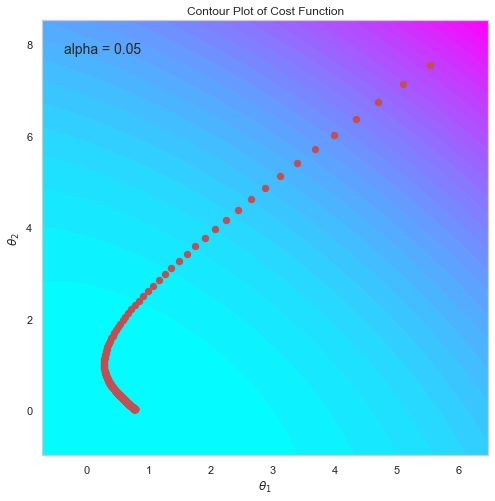

Total no of iterations: 141
THETA [[-4.43201349e-02  7.79258626e-01  1.60230344e-02]
 [ 9.77545939e-03  5.09884724e+00  7.13011595e+00]
 [ 1.47417800e-02  4.32902200e+00  6.37075517e+00]
 [ 1.59629696e-02  3.67214073e+00  5.70708450e+00]
 [ 1.43158387e-02  3.11236544e+00  5.12629637e+00]
 [ 1.05197143e-02  2.63605235e+00  4.61733057e+00]
 [ 5.16168862e-03  2.23144892e+00  4.17063443e+00]
 [-1.28194964e-03  1.88843266e+00  3.77795594e+00]
 [-8.42754182e-03  1.59828603e+00  3.43216528e+00]
 [-1.59686666e-02  1.35350234e+00  3.12710103e+00]
 [-2.36631187e-02  1.14761844e+00  2.85743736e+00]
 [-3.13219083e-02  9.75070497e-01  2.61856963e+00]
 [-3.87999821e-02  8.31069692e-01  2.40651559e+00]
 [-4.59884080e-02  7.11495021e-01  2.21783026e+00]
 [-5.28078061e-02  6.12800932e-01  2.04953245e+00]
 [-5.92028359e-02  5.31937691e-01  1.89904137e+00]
 [-6.51375824e-02  4.66282741e-01  1.76412197e+00]
 [-7.05917019e-02  4.13581538e-01  1.64283777e+00]
 [-7.55572128e-02  3.71896555e-01  1.53351019e+0

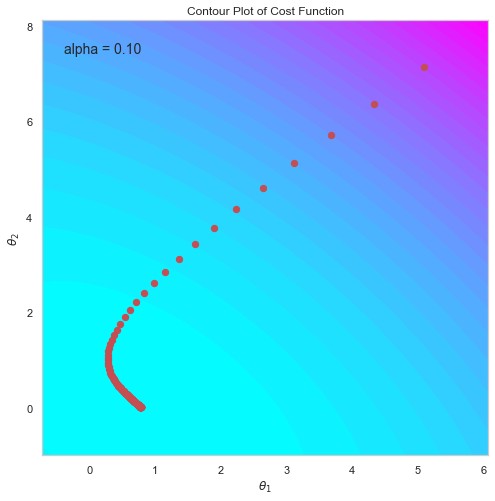

Total no of iterations: 100
THETA [[-4.45374655e-02  7.83770964e-01  1.37424905e-02]
 [ 1.18797277e-02  4.69432994e+00  6.73873847e+00]
 [ 1.44464674e-02  3.66491187e+00  5.70936436e+00]
 [ 1.07508751e-02  2.85563795e+00  4.86681031e+00]
 [ 3.05696615e-03  2.22166809e+00  4.17492679e+00]
 [-6.97558350e-03  1.72717446e+00  3.60470713e+00]
 [-1.81490615e-02  1.34353711e+00  3.13286645e+00]
 [-2.96168066e-02  1.04790032e+00  2.74070406e+00]
 [-4.07970557e-02  8.22017871e-01  2.41319266e+00]
 [-5.13062437e-02  6.51329141e-01  2.13824903e+00]
 [-6.09075590e-02  5.24220129e-01  1.90615012e+00]
 [-6.94714394e-02  4.31432298e-01  1.70906536e+00]
 [-7.69453917e-02  3.65589721e-01  1.54068214e+00]
 [-8.33310748e-02  3.20820877e-01  1.39590580e+00]
 [-8.86670216e-02  2.92456152e-01  1.27061931e+00]
 [-9.30157283e-02  2.76785928e-01  1.16149072e+00]
 [-9.64541093e-02  2.70867116e-01  1.06581885e+00]
 [-9.90665358e-02  2.72368466e-01  9.81409642e-01]
 [-1.00939849e-01  2.79446883e-01  9.06476982e-0

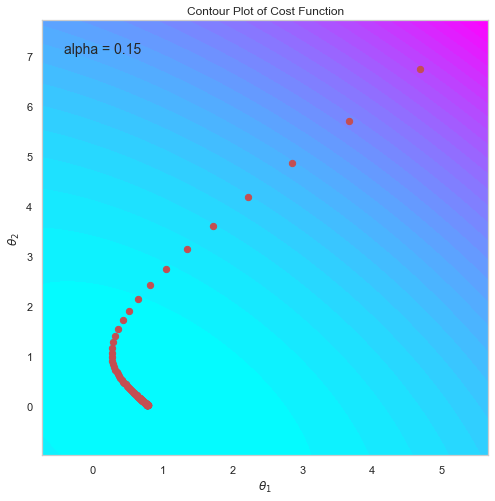

Total no of iterations: 78
THETA [[-4.49675660e-02  7.87186216e-01  1.27525264e-02]
 [ 1.24655993e-02  4.31794051e+00  6.37381264e+00]
 [ 1.07478816e-02  3.09531503e+00  5.13231687e+00]
 [ 9.75867656e-04  2.21173364e+00  4.17924547e+00]
 [-1.27825526e-02  1.57798522e+00  3.44287539e+00]
 [-2.79002914e-02  1.12799061e+00  2.86973113e+00]
 [-4.27467786e-02  8.12830395e-01  2.41990703e+00]
 [-5.63714416e-02  5.96312578e-01  2.06359190e+00]
 [-6.82796331e-02  4.51683304e-01  1.77848666e+00]
 [-7.82752219e-02  3.59185936e-01  1.54788507e+00]
 [-8.63510567e-02  3.04249868e-01  1.35924722e+00]
 [-9.26136463e-02  2.76146707e-01  1.20313891e+00]
 [-9.72321547e-02  2.66993340e-01  1.07244292e+00]
 [-1.00404556e-01  2.71012456e-01  9.61772266e-01]
 [-1.02335801e-01  2.83984116e-01  8.67033592e-01]
 [-1.03224295e-01  3.02839115e-01  7.85102126e-01]
 [-1.03254069e-01  3.25357546e-01  7.13579548e-01]
 [-1.02590758e-01  3.49945437e-01  6.50613532e-01]
 [-1.01380092e-01  3.75469289e-01  5.94763138e-01

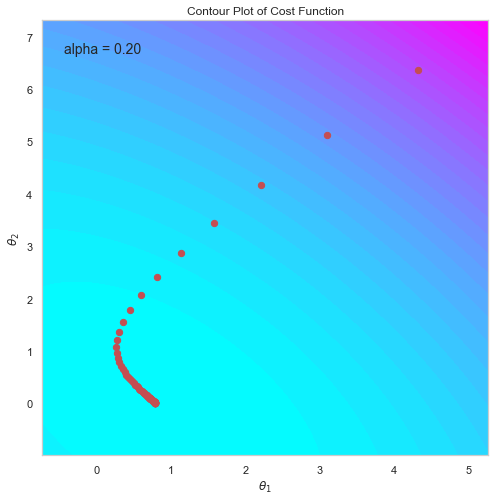

Total no of iterations: 65
THETA [[-4.54222821e-02  7.90439393e-01  1.19005913e-02]
 [ 1.17561552e-02  3.96789025e+00  6.03355217e+00]
 [ 4.62961778e-03  2.60776312e+00  4.62842466e+00]
 [-1.12597181e-02  1.70655798e+00  3.61500547e+00]
 [-2.99577335e-02  1.11794948e+00  2.87593449e+00]
 [-4.81484534e-02  7.41521450e-01  2.32990096e+00]
 [-6.41534033e-02  5.08432583e-01  1.92047695e+00]
 [-7.72825273e-02  3.71551056e-01  1.60842007e+00]
 [-8.74183583e-02  2.98665515e-01  1.36636636e+00]
 [-9.47539227e-02  2.67813693e-01  1.17516990e+00]
 [-9.96311348e-02  2.64068665e-01  1.02137744e+00]
 [-1.02444204e-01  2.77328380e-01  8.95485117e-01]
 [-1.03584547e-01  3.00795695e-01  7.90734447e-01]
 [-1.03411734e-01  3.29933602e-01  7.02280152e-01]
 [-1.02240380e-01  3.61747427e-01  6.26614430e-01]
 [-1.00336481e-01  3.94291999e-01  5.61168208e-01]
 [-9.79190325e-02  4.26333545e-01  5.04034547e-01]
 [-9.51643680e-02  4.57118010e-01  4.53776437e-01]
 [-9.22116311e-02  4.86212519e-01  4.09292917e-01

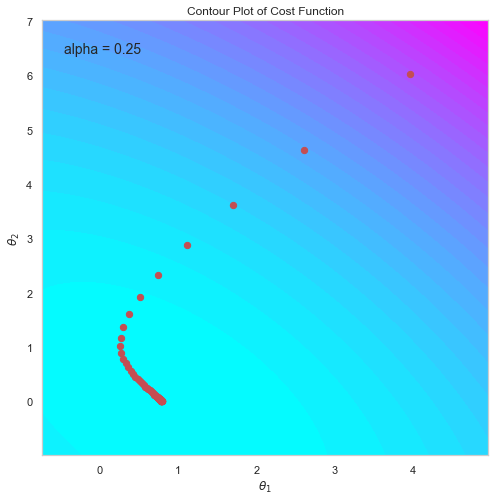

Total no of iterations: 55
THETA [[-4.59923068e-02  7.93028925e-01  1.18133431e-02]
 [ 9.95285307e-03  3.64249839e+00  5.71628715e+00]
 [-3.11677632e-03  2.19137907e+00  4.18796940e+00]
 [-2.44691124e-02  1.31270478e+00  3.15037952e+00]
 [-4.65035401e-02  7.94025165e-01  2.43345777e+00]
 [-6.56938043e-02  5.00352194e-01  1.92770010e+00]
 [-8.07577854e-02  3.46069430e-01  1.56239328e+00]
 [-9.15826891e-02  2.77010602e-01  1.29169888e+00]
 [-9.86082057e-02  2.59028071e-01  1.08575188e+00]
 [-1.02484025e-01  2.70702794e-01  9.24963790e-01]
 [-1.03889142e-01  2.98696967e-01  7.96374004e-01]
 [-1.03444557e-01  3.34792743e-01  6.91310793e-01]
 [-1.01678240e-01  3.74006540e-01  6.03889978e-01]
 [-9.90180542e-02  4.13389348e-01  5.30049699e-01]
 [-9.57984687e-02  4.51264426e-01  4.66928491e-01]
 [-9.22731250e-02  4.86743772e-01  4.12463401e-01]
 [-8.86289174e-02  5.19422177e-01  3.65129301e-01]
 [-8.49994202e-02  5.49184300e-01  3.23768919e-01]
 [-8.14766950e-02  5.76083619e-01  2.87481302e-01

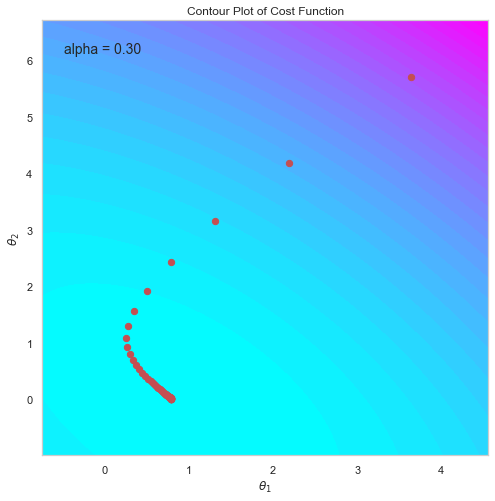

Total no of iterations: 48
THETA [[-0.04654837  0.79562747  0.01165561]
 [ 0.00723725  3.34018586  5.42045671]
 [-0.01186029  1.83667853  3.80251285]
 [-0.0376304   1.00801851  2.76624544]
 [-0.06132073  0.57060761  2.0849811 ]
 [-0.07975363  0.35773206  1.6230298 ]
 [-0.09243234  0.27168171  1.29878518]
 [-0.10001406  0.25544464  1.06284619]
 [-0.1035368   0.27597938  0.88503603]
 [-0.10405355  0.31433363  0.74669275]
 [-0.10248007  0.35981111  0.63608462]
 [-0.09955006  0.40653153  0.5456788 ]
 [-0.09582008  0.45140462  0.47050993]
 [-0.09169463  0.49293958  0.40720227]
 [-0.08745628  0.53054754  0.35338072]
 [-0.08329416  0.56413479  0.30731356]
 [-0.07932821  0.59386721  0.26769377]
 [-0.07562858  0.62003531  0.23350347]
 [-0.0722305   0.64297823  0.20392845]
 [-0.06914552  0.66304201  0.17830315]
 [-0.06636955  0.68055784  0.15607423]
 [-0.06388881  0.6958316   0.13677581]
 [-0.0616838   0.7091399   0.12001198]
 [-0.0597322   0.72072956  0.10544397]
 [-0.05801071  0.73081892  0.09

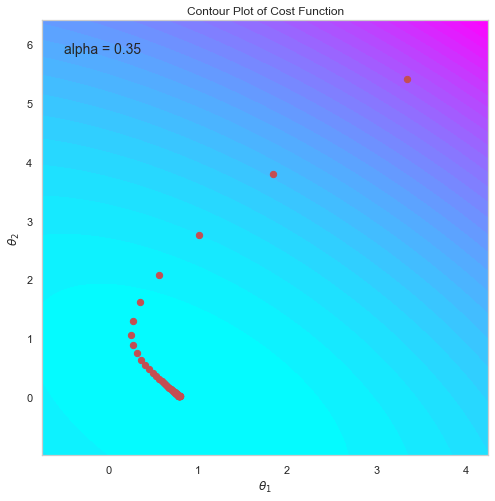

Total no of iterations: 43
THETA [[-4.70846592e-02  7.98267910e-01  1.13855971e-02]
 [ 3.77262567e-03  3.05946932e+00  5.14460219e+00]
 [-2.11036493e-02  1.53539564e+00  3.46473140e+00]
 [-5.00693019e-02  7.74605867e-01  2.44718966e+00]
 [-7.38829397e-02  4.21073449e-01  1.80767888e+00]
 [-9.02540354e-02  2.81330229e-01  1.38792240e+00]
 [-9.97399025e-02  2.50749256e-01  1.09915617e+00]
 [-1.03820069e-01  2.73181804e-01  8.91065514e-01]
 [-1.04056894e-01  3.18868580e-01  7.34690612e-01]
 [-1.01779699e-01  3.72361218e-01  6.13003904e-01]
 [-9.80077145e-02  4.25925711e-01  5.15704213e-01]
 [-9.34716869e-02  4.75946640e-01  4.36330663e-01]
 [-8.86680380e-02  5.20973001e-01  3.70654656e-01]
 [-8.39164632e-02  5.60661159e-01  3.15777350e-01]
 [-7.94098317e-02  5.95207350e-01  2.69617722e-01]
 [-7.52534848e-02  6.25046676e-01  2.30617788e-01]
 [-7.14944895e-02  6.50696638e-01  1.97569283e-01]
 [-6.81425905e-02  6.72678601e-01  1.69508877e-01]
 [-6.51847705e-02  6.91480887e-01  1.45652570e-01

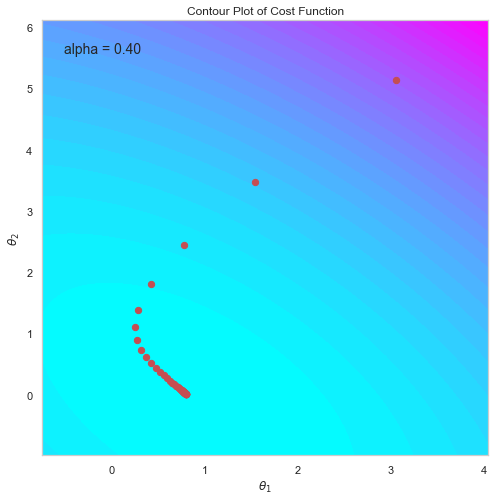

Total no of iterations: 39
THETA [[-4.76288333e-02  8.00792362e-01  1.12009380e-02]
 [-2.94569182e-04  2.79895567e+00  4.88736066e+00]
 [-3.04604781e-02  1.28033020e+00  3.16827147e+00]
 [-6.13685107e-02  5.98030855e-01  2.18079400e+00]
 [-8.40315395e-02  3.25552296e-01  1.58445100e+00]
 [-9.74945571e-02  2.48861317e-01  1.20285215e+00]
 [-1.03495541e-01  2.61356308e-01  9.43596497e-01]
 [-1.04268703e-01  3.10622477e-01  7.57459221e-01]
 [-1.01755147e-01  3.71464899e-01  6.17559531e-01]
 [-9.74084012e-02  4.32269181e-01  5.08699367e-01]
 [-9.22258961e-02  4.88118437e-01  4.21885098e-01]
 [-8.68467974e-02  5.37332635e-01  3.51494885e-01]
 [-8.16528906e-02  5.79739366e-01  2.93799941e-01]
 [-7.68516076e-02  6.15818762e-01  2.46181309e-01]
 [-7.25377487e-02  6.46288265e-01  2.06706041e-01]
 [-6.87366931e-02  6.71907482e-01  1.73890757e-01]
 [-6.54333996e-02  6.93392118e-01  1.46564233e-01]
 [-6.25912066e-02  7.11381116e-01  1.23783371e-01]
 [-6.01636162e-02  7.26428984e-01  1.04778786e-01

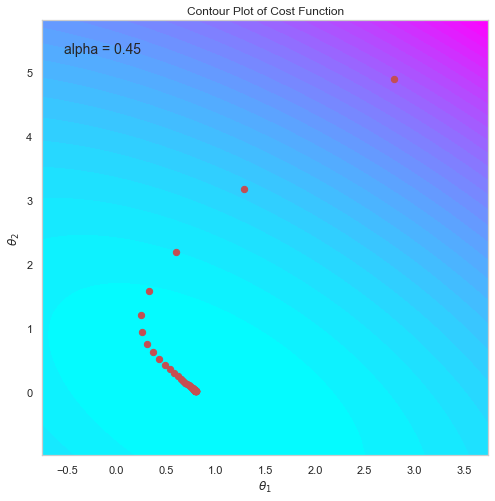

Total no of iterations: 35
THETA [[-0.04822378  0.80293773  0.01143392]
 [-0.00483329  2.55733673  4.64745893]
 [-0.03963601  1.06521358  2.90762346]
 [-0.07129783  0.46665965  1.95705797]
 [-0.09183378  0.26924495  1.40248541]
 [-0.1019433   0.245025    1.05416368]
 [-0.10453782  0.28969543  0.81904003]
 [-0.10245525  0.3565303   0.65029393]
 [-0.09784121  0.42543784  0.52344621]
 [-0.09213119  0.48849878  0.42499907]
 [-0.08620535  0.54323467  0.34699715]
 [-0.08055808  0.58949634  0.28439446]
 [-0.07543476  0.62804373  0.23375692]
 [-0.0709291   0.65991261  0.19260534]
 [-0.06704795  0.68614475  0.1590691 ]
 [-0.06375218  0.7076837   0.1316933 ]
 [-0.06098153  0.72534428  0.10932393]
 [-0.05866906  0.73981329  0.09103441]
 [-0.05674903  0.75166213  0.07607512]
 [-0.05516087  0.76136277  0.06383693]
 [-0.05385086  0.76930355  0.05382345]
 [-0.05277249  0.77580319  0.04562953]
 [-0.05188614  0.78112299  0.03892414]
 [-0.05115841  0.78547702  0.03343668]
 [-0.05056143  0.78904056  0.02

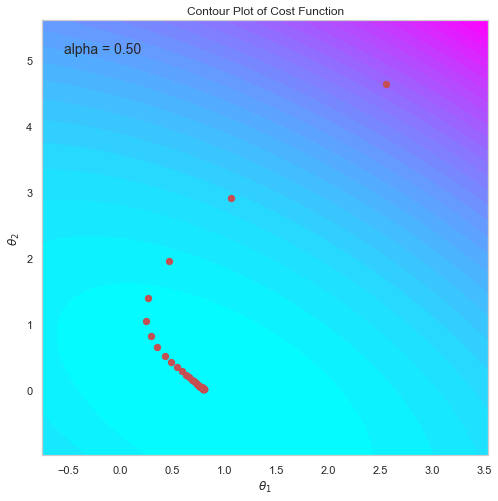

Total no of iterations: 33
THETA [[-0.04871685  0.80560309  0.01095217]
 [-0.00972665  2.3333843   4.4237078 ]
 [-0.04841073  0.88459125  2.67801165]
 [-0.07976081  0.37112785  1.76793117]
 [-0.09748614  0.2411555   1.25217905]
 [-0.10411642  0.25936803  0.93228164]
 [-0.10362078  0.32715819  0.71684627]
 [-0.09924532  0.40461235  0.56216085]
 [-0.09317025  0.47674366  0.44609613]
 [-0.0867002   0.53893008  0.35656237]
 [-0.0805386   0.59067812  0.28634488]
 [-0.07501398  0.63298732  0.23074865]
 [-0.07023756  0.6672648   0.18648982]
 [-0.0662035   0.69490159  0.15114828]
 [-0.06284927  0.71712696  0.12287841]
 [-0.06008996  0.73497586  0.10024288]
 [-0.05783687  0.74929951  0.08210847]
 [-0.0560067   0.76078961  0.06757534]
 [-0.05452556  0.77000476  0.05592605]
 [-0.05333004  0.77739456  0.04658728]
 [-0.05236687  0.78332022  0.03910021]
 [-0.05159193  0.78807169  0.03309743]
 [-0.05096903  0.79188157  0.02828454]
 [-0.0504687   0.79493643  0.02442561]
 [-0.05006702  0.7973859   0.02

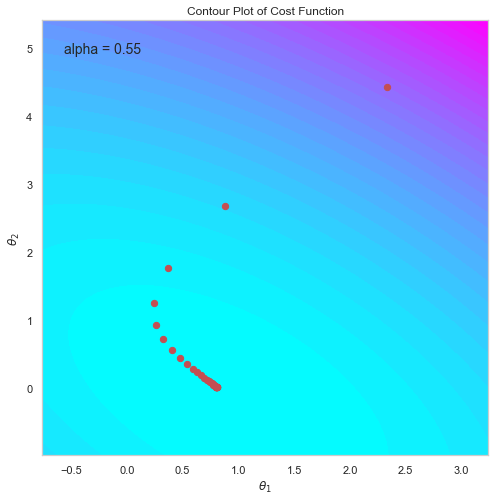

Total no of iterations: 30
THETA [[-0.04929896  0.8076376   0.01120787]
 [-0.0148707   2.12594548  4.21499678]
 [-0.05662652  0.73371968  2.47529827]
 [-0.08675415  0.30390744  1.60693503]
 [-0.10124985  0.23313651  1.12632855]
 [-0.10451114  0.28479294  0.8304655 ]
 [-0.10137303  0.3684566   0.63123995]
 [-0.09528269  0.45147651  0.48827362]
 [-0.08831013  0.52363148  0.38151341]
 [-0.08155262  0.58309233  0.29993628]
 [-0.07551018  0.63091284  0.23680595]
 [-0.07034825  0.66892076  0.18761529]
 [-0.06606055  0.69895309  0.14914552]
 [-0.06256277  0.7226136   0.11900089]
 [-0.05974329  0.74122646  0.09535474]
 [-0.05748882  0.75585749  0.07679544]
 [-0.05569602  0.76735416  0.06222402]
 [-0.05427572  0.77638621  0.05078153]
 [-0.05315345  0.78348133  0.04179516]
 [-0.05226828  0.78905462  0.03473727]
 [-0.05157099  0.79343241  0.0291938 ]
 [-0.05102218  0.7968711   0.02483971]
 [-0.0505905   0.79957213  0.02141976]
 [-0.05025109  0.80169373  0.0187335 ]
 [-0.04998431  0.8033602   0.01

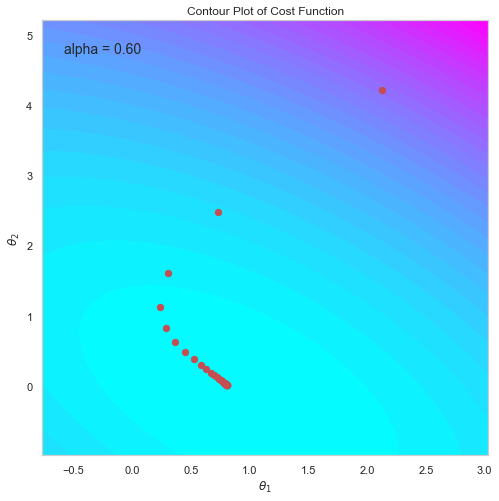

Total no of iterations: 28
THETA [[-0.04982913  0.80989325  0.01112535]
 [-0.02017336  1.93393824  4.02028902]
 [-0.06417511  0.60847621  2.29589981]
 [-0.09233723  0.25895515  1.4688571 ]
 [-0.10340896  0.23917064  1.01952392]
 [-0.10357224  0.31651959  0.74394449]
 [-0.09829218  0.41041295  0.55830499]
 [-0.09102277  0.49541574  0.42544787]
 [-0.0836141   0.56554936  0.32701928]
 [-0.07691435  0.62126308  0.25274116]
 [-0.07121902  0.66477739  0.19615403]
 [-0.06654811  0.69849642  0.15283656]
 [-0.0628011   0.72452778  0.11959611]
 [-0.05983735  0.7445885   0.09405671]
 [-0.05751459  0.76003494  0.0744216 ]
 [-0.05570521  0.77192367  0.05932071]
 [-0.05430143  0.78107237  0.04770485]
 [-0.05321529  0.78811193  0.03876886]
 [-0.05237644  0.79352835  0.03189407]
 [-0.05172937  0.79769581  0.02660487]
 [-0.05123065  0.80090229  0.02253548]
 [-0.05084649  0.80336936  0.01940454]
 [-0.05055068  0.80526754  0.01699562]
 [-0.05032296  0.806728    0.01514221]
 [-0.05014769  0.80785168  0.01

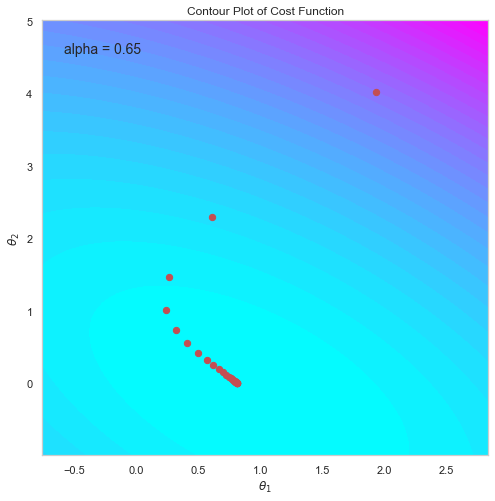

Total no of iterations: 26
THETA [[-0.05036926  0.81198034  0.01119833]
 [-0.02555338  1.75634726  3.83861669]
 [-0.07098823  0.50527995  2.13671412]
 [-0.09660933  0.23142703  1.34950405]
 [-0.1042442   0.25483095  0.9276946 ]
 [-0.1016786   0.35136312  0.66931713]
 [-0.09475631  0.45118221  0.49533617]
 [-0.08677216  0.53568751  0.37148893]
 [-0.07928363  0.60254875  0.2807232 ]
 [-0.07287714  0.65402144  0.21323791]
 [-0.06765973  0.69318132  0.16271261]
 [-0.06353116  0.72281771  0.12475913]
 [-0.06032118  0.74519394  0.09620367]
 [-0.05785286  0.76207071  0.07470232]
 [-0.05596821  0.77479361  0.05850619]
 [-0.05453576  0.78438299  0.04630387]
 [-0.05345023  0.79160995  0.03710955]
 [-0.05262919  0.79705626  0.03018134]
 [-0.05200898  0.80116058  0.02496055]
 [-0.05154085  0.80425358  0.02102633]
 [-0.05118772  0.80658443  0.01806159]
 [-0.05092142  0.80834093  0.01582741]
 [-0.05072065  0.80966462  0.01414377]
 [-0.05056931  0.81066214  0.012875  ]
 [-0.05045524  0.81141385  0.01

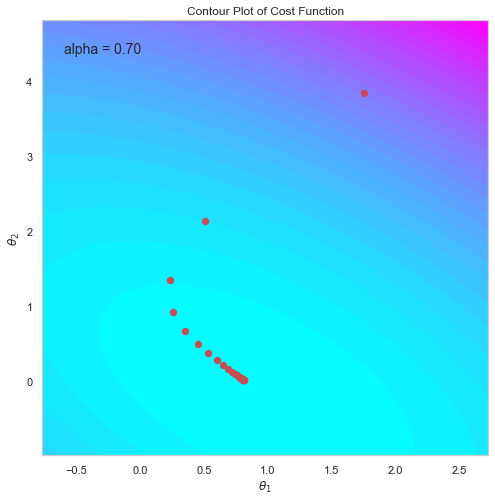

Total no of iterations: 25
THETA [[-0.05084461  0.81439093  0.01080106]
 [-0.03093943  1.59222     3.66907649]
 [-0.07702953  0.42102259  1.99505692]
 [-0.09969296  0.21744701  1.24550235]
 [-0.10401753  0.27687582  0.84776999]
 [-0.0991414   0.38723304  0.60413494]
 [-0.09104217  0.48975394  0.4404214 ]
 [-0.08272556  0.57208907  0.32482362]
 [-0.07541767  0.63496378  0.24122325]
 [-0.06945217  0.68203237  0.18009326]
 [-0.06477366  0.71697958  0.13517008]
 [-0.061189    0.74283718  0.10208199]
 [-0.05848082  0.76194128  0.07768561]
 [-0.05645248  0.77604703  0.05968896]
 [-0.05494152  0.78645946  0.04641012]
 [-0.05381979  0.79414477  0.03661117]
 [-0.05298881  0.79981697  0.02937972]
 [-0.05237406  0.80400331  0.02404287]
 [-0.05191967  0.80709299  0.02010417]
 [-0.05158399  0.8093733   0.01719731]
 [-0.0513361   0.81105625  0.01505195]
 [-0.05115307  0.81229833  0.0134686 ]
 [-0.05101796  0.81321504  0.01230003]
 [-0.05091822  0.8138916   0.01143758]
 [-0.05084461  0.81439093  0.01

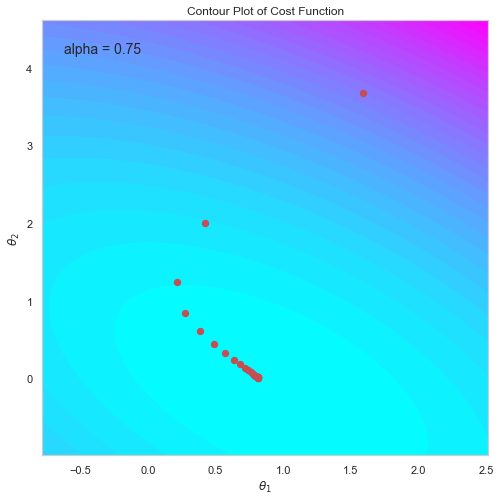

Total no of iterations: 23
THETA [[-0.05139013  0.81621104  0.01109863]
 [-0.03626918  1.44066302  3.51082558]
 [-0.0822877   0.35300795  1.86860647]
 [-0.10172175  0.21391936  1.15413745]
 [-0.10296405  0.30294529  0.7774259 ]
 [-0.09620861  0.4227862   0.54661396]
 [-0.08734463  0.52563425  0.39217248]
 [-0.07899662  0.60470882  0.28427789]
 [-0.07204886  0.66324147  0.20743408]
 [-0.06660562  0.70594702  0.15224822]
 [-0.0624794   0.73692819  0.11247494]
 [-0.05941034  0.75935289  0.0837657 ]
 [-0.05715313  0.77556961  0.06302871]
 [-0.05550423  0.78729276  0.04804559]
 [-0.05430467  0.79576628  0.03721826]
 [-0.05343419  0.80189065  0.0293935 ]
 [-0.05280349  0.80631703  0.02373845]
 [-0.05234697  0.80951618  0.0196514 ]
 [-0.0520167   0.81182835  0.01669755]
 [-0.05177787  0.81349945  0.0145627 ]
 [-0.05160519  0.81470723  0.01301975]
 [-0.05148036  0.81558014  0.0119046 ]
 [-0.05139013  0.81621104  0.01109863]]
[[ 4467.91783731  4165.72690023  3878.09014404 ...  1733.25841153
   

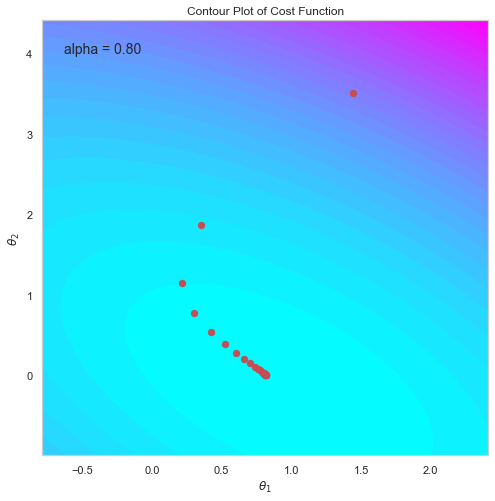

Total no of iterations: 22
THETA [[-0.05186371  0.81840963  0.01085562]
 [-0.04148851  1.3008384   3.36307763]
 [-0.08677086  0.29889889  1.75535546]
 [-0.1028319   0.21837679  1.07322419]
 [-0.1012886   0.33133378  0.71489513]
 [-0.09307244  0.45718708  0.49543493]
 [-0.08379469  0.5586437   0.3495513 ]
 [-0.07564236  0.63378219  0.24894158]
 [-0.06916906  0.68785427  0.17848623]
 [-0.06428131  0.7263609   0.12884111]
 [-0.06069017  0.75367578  0.09377168]
 [-0.05809221  0.7730233   0.06897296]
 [-0.05622956  0.78671989  0.05142931]
 [-0.05490113  0.79641409  0.03901582]
 [-0.05395665  0.80327496  0.03023154]
 [-0.05328641  0.80813048  0.02401517]
 [-0.0528113   0.81156675  0.01961593]
 [-0.05247473  0.81399861  0.01650261]
 [-0.0522364   0.81571965  0.01429933]
 [-0.05206767  0.81693764  0.01274006]
 [-0.05194824  0.81779961  0.01163656]
 [-0.05186371  0.81840963  0.01085562]]
[[ 4454.67172337  4153.11224857  3866.10695467 ...  1512.48680499
   1618.44439508  1738.95616606]
 [ 4240.6

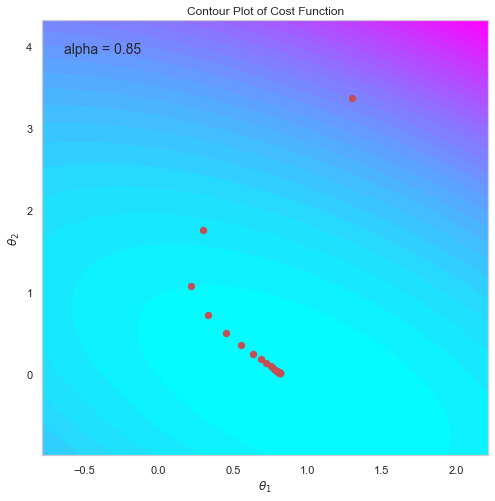

Total no of iterations: 21
THETA [[-0.05233438  0.82050969  0.01068124]
 [-0.04655081  1.17196055  3.22509924]
 [-0.09050185  0.25667113  1.65356912]
 [-0.10315629  0.22885763  1.00100239]
 [-0.09916544  0.3608202   0.65882638]
 [-0.08987781  0.48994255  0.44960507]
 [-0.08047498  0.58878943  0.31175744]
 [-0.07268158  0.65960932  0.21808534]
 [-0.06674678  0.70925701  0.15366532]
 [-0.06241451  0.74380008  0.10915976]
 [-0.05932299  0.76776989  0.07835836]
 [-0.05714454  0.78438716  0.05702656]
 [-0.05562041  0.79590343  0.04224885]
 [-0.05455842  0.80388364  0.03201027]
 [-0.05382018  0.80941333  0.02491619]
 [-0.05330769  0.81324495  0.02000073]
 [-0.05295219  0.81589994  0.01659478]
 [-0.05270571  0.81773962  0.01423477]
 [-0.05253485  0.81901436  0.01259949]
 [-0.05241644  0.81989765  0.01146638]
 [-0.05233438  0.82050969  0.01068124]]
[[ 4422.76474952  4122.71827485  3837.22598107 ...  1430.02742551
   1522.94383484  1630.41442506]
 [ 4209.48450645  3916.54907988  3638.16783419 .

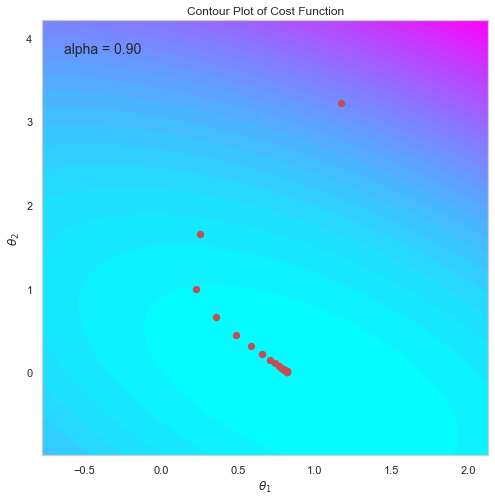

In [29]:
#create an array of learning rates from 0.05 to 0.95 in steps of 0.05
learning_rates = np.arange(0.05, 0.95, 0.05)
# contour_plot(learning_rates)
# k=1
for i in learning_rates:
    contour_sto(i)
    # k+=1